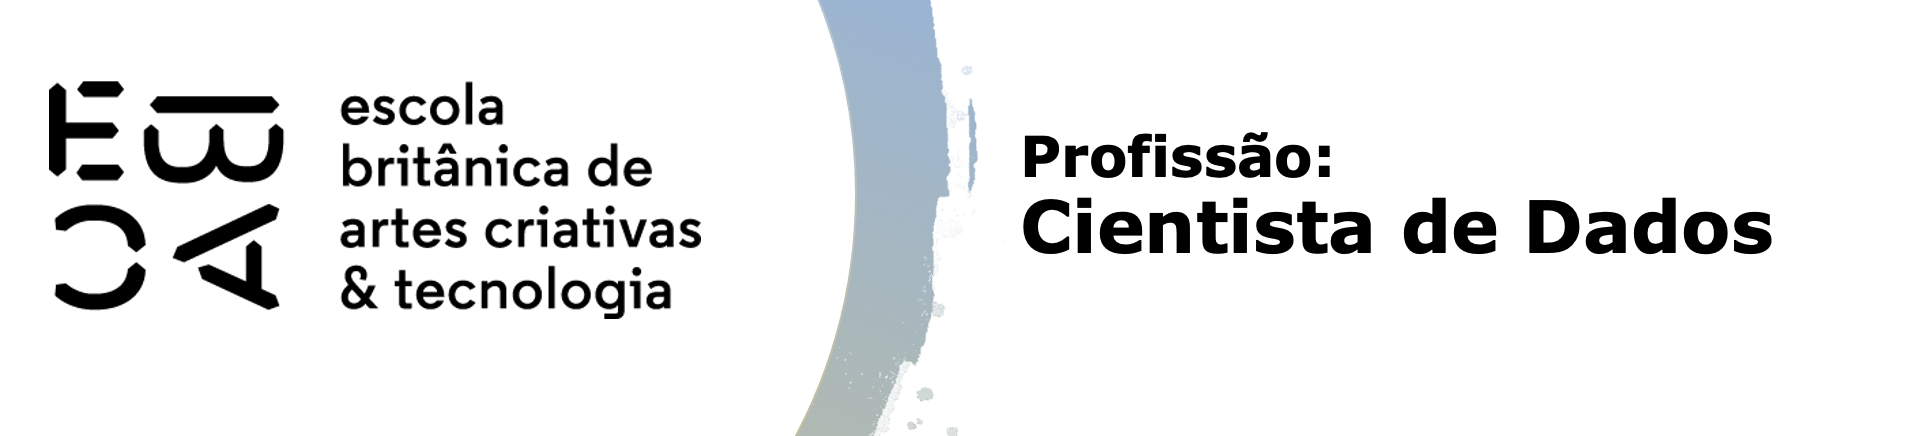

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv(r".\input\train\y_train.txt")

X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv(r'.\input\test\y_test.txt')

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [18]:
cols = ['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16', '42 tGravityAcc-mean()-Y']

X_train = X_train[cols]
X_test  = X_test [cols]


clf = DecisionTreeClassifier(min_samples_leaf=20, 
                             random_state=42)
path = clf.cost_complexity_pruning_path(X=X_train, 
                                        y=y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas >= 0])

print('ccp_alphas:', ccp_alphas.size)

ccp_alphas: 108


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [19]:

dtree = DecisionTreeClassifier(random_state=1993)

In [20]:
parametros = {'ccp_alpha': ccp_alphas}

In [21]:
%%time
grid = GridSearchCV(estimator = dtree, param_grid = parametros, cv=15 )
grid.fit(X_train, y_train)

CPU times: total: 31.7 s
Wall time: 43.3 s


GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=1993),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.43815742e-06, 6.59906426e-06, 8.26772494e-06,
       9.85633407e-06, 1.04385454e-05, 1.07972583e-05, 1.18205607e-05,
       1.25492253e-05, 2.00538489e-05, 2.04026115e-05, 2.06086985e-05,
       2.30817423e-05, 2.94533941e-05, 3.34812087e-05, 3.68012474e-05,
       4.688478...
       1.28759635e-03, 1.34967421e-03, 1.46211448e-03, 1.52178632e-03,
       1.56461314e-03, 2.03069708e-03, 2.03423165e-03, 2.12973114e-03,
       2.18481278e-03, 2.23787246e-03, 2.47779467e-03, 2.55110680e-03,
       3.17825327e-03, 3.76250065e-03, 4.80010833e-03, 5.44646874e-03,
       7.08292405e-03, 7.22545496e-03, 9.80404445e-03, 4.42597014e-02,
       6.33689986e-02, 1.09227591e-01, 1.67257720e-01, 1.86138242e-01])})

In [22]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
102,0.035360,0.018652,0.008077,0.007301,0.009804,{'ccp_alpha': 0.009804044448276247},0.847251,0.729124,0.871429,0.867347,...,0.740816,0.816327,0.779592,0.844898,0.861224,0.810204,0.732653,0.811486,0.052480,1
101,0.020918,0.007279,0.004166,0.006909,0.007225,{'ccp_alpha': 0.007225454960668447},0.820774,0.733198,0.871429,0.867347,...,0.740816,0.826531,0.779592,0.844898,0.861224,0.810204,0.732653,0.809312,0.052956,2
100,0.024438,0.008017,0.001715,0.004240,0.007083,{'ccp_alpha': 0.007082924052720332},0.820774,0.733198,0.871429,0.867347,...,0.740816,0.826531,0.779592,0.844898,0.861224,0.810204,0.732653,0.809312,0.052956,2
98,0.025163,0.007095,0.000000,0.000000,0.0048,{'ccp_alpha': 0.0048001083301117894},0.820774,0.733198,0.863265,0.867347,...,0.746939,0.834694,0.802041,0.810204,0.861224,0.773469,0.712245,0.807408,0.053991,4
99,0.020942,0.007341,0.004166,0.006909,0.005446,{'ccp_alpha': 0.005446468743425373},0.820774,0.733198,0.871429,0.867347,...,0.740816,0.826531,0.779592,0.810204,0.861224,0.773469,0.732653,0.806863,0.053151,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.023244,0.007589,0.003966,0.006613,0.000917,{'ccp_alpha': 0.0009171003613276212},0.851324,0.665988,0.777551,0.861224,...,0.695918,0.789796,0.726531,0.720408,0.857143,0.728571,0.795918,0.764828,0.062644,104
104,0.023376,0.007605,0.003824,0.006444,0.063369,{'ccp_alpha': 0.06336899855231529},0.769857,0.619145,0.800000,0.683673,...,0.746939,0.728571,0.757143,0.718367,0.716327,0.581633,0.704082,0.705797,0.058602,105
105,0.026581,0.007902,0.004774,0.006921,0.109228,{'ccp_alpha': 0.10922759076839632},0.543788,0.619145,0.544898,0.544898,...,0.546939,0.544898,0.544898,0.544898,0.544898,0.581633,0.669388,0.571951,0.041475,106
106,0.022358,0.007686,0.003594,0.006261,0.167258,{'ccp_alpha': 0.16725771957779972},0.543788,0.541752,0.377551,0.377551,...,0.546939,0.544898,0.544898,0.544898,0.544898,0.542857,0.542857,0.511417,0.066951,107


In [23]:
melhor_ccp = resultados.iloc[grid.best_index_]['param_ccp_alpha']

print('\t mean_test_score:', grid.best_score_)
print('\t param_ccp_alpha:', melhor_ccp)

	 mean_test_score: 0.8114862075176302
	 param_ccp_alpha: 0.009804044448276247


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

Parâmetro                    Valor
ccp_alpha                 0.009804
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.16346153846153846


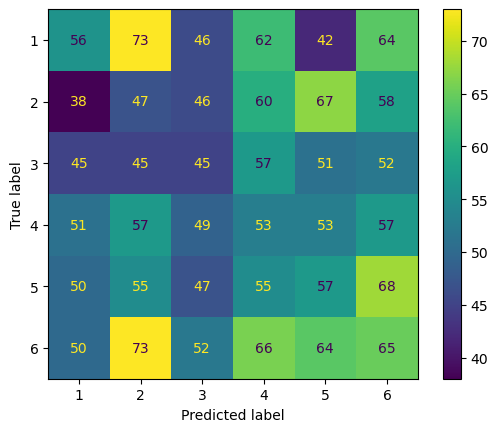

CPU times: total: 172 ms
Wall time: 242 ms


In [24]:
%%time

clf = DecisionTreeClassifier(random_state=42, ccp_alpha=melhor_ccp).fit(X_train, y_train)
print(pd.DataFrame(data=clf.get_params(), index=pd.Index(data=['Valor'], name='Parâmetro')).T, '\n')
print('Acurácia da árvore na base de testes:', clf.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [25]:
%%time

matriz = confusion_matrix(y_true=y_test, 
                          y_pred=grid.predict(X_test))

acertos = [matriz[x,x] for x in range(6)]
erros   = sum(matriz) - acertos

pd.DataFrame(data={'acertos':acertos, 
                   'erros':erros}, 
             index=pd.Index(data=list(range(1,7)), 
                            name='classe')
            ).sort_values(by='erros', 
                          ascending=False)

CPU times: total: 0 ns
Wall time: 9 ms


,acertos,erros
classe,,
2,47,303
4,53,300
6,65,299
5,57,277
3,45,240
1,56,234


In [29]:
%%time

clf_2 = DecisionTreeClassifier(min_samples_leaf=20, 
                               max_depth=4, 
                               random_state=42).fit(X=X_train, 
                                                    y=y_train)

melhores_classe2 = (pd.DataFrame(data={'var': X_train.columns, 
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_', 
                                   ascending=False))
cols_classe2 = melhores_classe2['var'].values[:3]
print('3 melhores variáveis:', cols_classe2, '\n')

cols_2 = cols + cols_classe2.tolist()
X_train = X_train[cols_2]
X_test = X_test[cols_2]
print('X_train: \n', X_train.columns)
print('X_test: \n', X_test.columns)

3 melhores variáveis: ['390 fBodyAccJerk-bandsEnergy()-1,16' '53 tGravityAcc-min()-X'
 '42 tGravityAcc-mean()-Y'] 

X_train: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '53 tGravityAcc-min()-X', '42 tGravityAcc-mean()-Y'],
      dtype='object')
X_test: 
 Index(['53 tGravityAcc-min()-X', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '42 tGravityAcc-mean()-Y', '390 fBodyAccJerk-bandsEnergy()-1,16',
       '53 tGravityAcc-min()-X', '42 tGravityAcc-mean()-Y'],
      dtype='object')
CPU times: total: 15.6 ms
Wall time: 14.3 ms


In [30]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42)
path_2 = clf_2.cost_complexity_pruning_path(X=X_train, 
                                            y=y_train)
ccp_alphas_2, impurities_2 = path_2.ccp_alphas, path_2.impurities
ccp_alphas_2 = np.unique(ccp_alphas_2[ccp_alphas_2 >= 0])

clf_2 = DecisionTreeClassifier(random_state=42)
grid_2 = GridSearchCV(estimator=clf_2, 
                      param_grid={'ccp_alpha': ccp_alphas_2[::10]}, 
                      cv=10, 
                      verbose=1)
grid_2.fit(X_train, y_train)

resultados_2 = pd.DataFrame(grid_2.cv_results_)
resultados_2.sort_values(by='rank_test_score')

Fitting 10 folds for each of 27 candidates, totalling 270 fits
CPU times: total: 8.33 s
Wall time: 11.8 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,0.039350,0.007004,0.001562,0.004687,0.001376,{'ccp_alpha': 0.001375941960978476},0.797554,0.725543,0.853061,0.761905,0.752381,0.782313,0.823129,0.738776,0.838095,0.790476,0.786323,0.040437,1
25,0.037762,0.008509,0.003472,0.006177,0.002238,{'ccp_alpha': 0.0022378724594895785},0.802989,0.773098,0.855782,0.765986,0.744218,0.783673,0.802721,0.737415,0.831293,0.748299,0.784547,0.036835,2
26,0.038168,0.002499,0.002742,0.001430,0.04426,{'ccp_alpha': 0.04425970139617491},0.737772,0.808424,0.798639,0.785034,0.755102,0.823129,0.831293,0.779592,0.780952,0.722449,0.782239,0.033672,3
17,0.047175,0.011542,0.003014,0.005145,0.000394,{'ccp_alpha': 0.00039373180667321133},0.737772,0.741848,0.805442,0.717007,0.768707,0.757823,0.779592,0.790476,0.842177,0.783673,0.772452,0.034487,4
14,0.045476,0.006798,0.002914,0.005059,0.000271,{'ccp_alpha': 0.00027090134203844644},0.745924,0.740489,0.823129,0.710204,0.752381,0.751020,0.783673,0.794558,0.832653,0.789116,0.772315,0.036806,5
16,0.037324,0.007841,0.003422,0.006157,0.000359,{'ccp_alpha': 0.0003590859630032645},0.739130,0.735054,0.814966,0.718367,0.753741,0.757823,0.785034,0.795918,0.838095,0.779592,0.771772,0.035875,6
15,0.040545,0.006925,0.001863,0.004673,0.000311,{'ccp_alpha': 0.00031089693766516395},0.730978,0.732337,0.813605,0.712925,0.761905,0.759184,0.783673,0.794558,0.835374,0.791837,0.771638,0.037144,7
11,0.045518,0.008536,0.003126,0.006251,0.000231,{'ccp_alpha': 0.00023122959738846563},0.767663,0.741848,0.824490,0.712925,0.751020,0.731973,0.782313,0.787755,0.829932,0.786395,0.771631,0.036238,8
12,0.052183,0.006938,0.000000,0.000000,0.000242,{'ccp_alpha': 0.00024180872929512753},0.754076,0.741848,0.823129,0.712925,0.751020,0.748299,0.778231,0.786395,0.829932,0.785034,0.771089,0.034785,9
10,0.037223,0.008280,0.003579,0.006176,0.000209,{'ccp_alpha': 0.00020921875568461815},0.773098,0.743207,0.819048,0.703401,0.751020,0.740136,0.780952,0.790476,0.821769,0.786395,0.770950,0.035071,10


In [33]:
melhor_ccp_2 = grid_2.best_params_['ccp_alpha']


print('\t mean_test_score:', grid_2.best_score_)
print('\t param_ccp_alpha:', melhor_ccp_2)

	 mean_test_score: 0.7863233880508724
	 param_ccp_alpha: 0.001375941960978476


Parâmetro                    Valor
ccp_alpha                 0.001376
class_weight                  None
criterion                     gini
max_depth                     None
max_features                  None
max_leaf_nodes                None
min_impurity_decrease          0.0
min_samples_leaf                 1
min_samples_split                2
min_weight_fraction_leaf       0.0
random_state                    42
splitter                      best 

Acurácia da árvore na base de testes: 0.1715587044534413


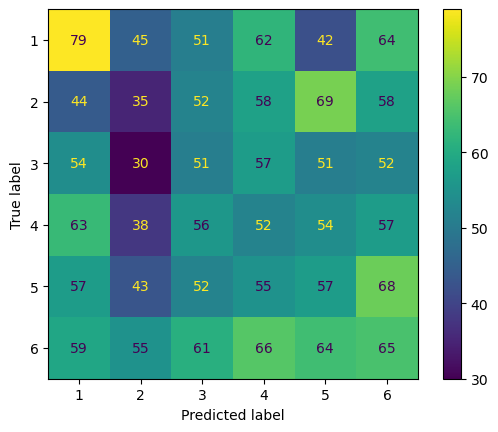

CPU times: total: 125 ms
Wall time: 254 ms


In [32]:
%%time

clf_2 = DecisionTreeClassifier(random_state=42, 
                               ccp_alpha=melhor_ccp_2
                              ).fit(X_train, y_train)
print(pd.DataFrame(data=clf_2.get_params(), 
                   index=pd.Index(data=['Valor'], 
                                  name='Parâmetro')
                  ).T, 
      '\n')

print('Acurácia da árvore na base de testes:', 
      clf_2.score(X=X_test, y=y_test))

ConfusionMatrixDisplay.from_estimator(estimator=clf_2, 
                                      X=X_test, 
                                      y=y_test)
plt.show()